In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import numpy as np
from sklearn.utils import shuffle

In [ ]:
FILE_PATH = "/content/drive/MyDrive/GPUs/Bert/Results/GPlay_Review/Training_Results.csv.xlsx"
SAVE_PATH = "/content/drive/MyDrive/GPUs/Bert/Results/GPlay_Review/"
df = pd.read_excel(FILE_PATH)
df = df.transpose()

df.head()

,0,1,2,3,4,5,6,7,8,9
EPOCH,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
TRAIN_ACC,0.668337,0.834803,0.923294,0.952932,0.966199,0.976501,0.981370,0.982006,0.984899,0.986310
VALIDATION_ACC,0.756345,0.837563,0.851523,0.866751,0.870558,0.875635,0.871827,0.876904,0.869289,0.878173
TRAINING_LOSS,0.736605,0.432251,0.238800,0.168561,0.121787,0.092483,0.070726,0.065634,0.050420,0.043793
VALIDATION_LOSS,0.612787,0.496509,0.637782,0.672134,0.678756,0.700134,0.803361,0.836290,0.849501,0.856895


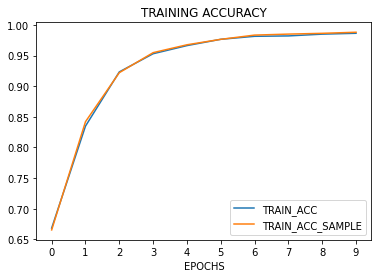

In [ ]:
#TRAIN
df_train = df.loc[['TRAIN_ACC', 'TRAIN_ACC_SAMPLE']]
df_train.head()

df_train = df_train.transpose()
df_train.plot(xticks=[0,1,2,3,4,5,6,7,8,9])
plt.title("TRAINING ACCURACY")
plt.xlabel("EPOCHS")
plt.savefig(SAVE_PATH + "TRAIN")

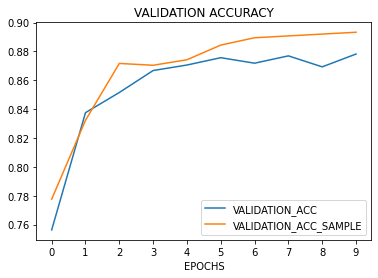

In [ ]:
df_validation = df.loc[['VALIDATION_ACC', 'VALIDATION_ACC_SAMPLE']]

df_validation = df_validation.transpose()

df_validation.plot(xticks=[0,1,2,3,4,5,6,7,8,9])
plt.title("VALIDATION ACCURACY")
plt.xlabel("EPOCHS")
plt.savefig(SAVE_PATH + "VALIDATION")

In [ ]:
df.index.get_value

<bound method Index.get_value of Index(['EPOCH', 'TRAIN_ACC', 'VALIDATION_ACC', 'TRAINING_LOSS',
       'VALIDATION_LOSS', 'TRAIN_ACC_SAMPLE', 'VALIDATION_ACC_SAMPLE',
       'TRAINING_LOSS_SAMPLE', 'VALIDATION_LOSS_SAMPLE'],
      dtype='object')>

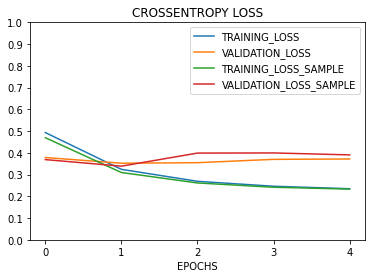

In [ ]:
df_loss = df.loc[['TRAINING_LOSS', 'VALIDATION_LOSS', 'TRAINING_LOSS_SAMPLE', 'VALIDATION_LOSS_SAMPLE']]

df_loss = df_loss.transpose()
df_loss.plot(yticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], xticks=[0,1,2,3,4])

plt.title("CROSSENTROPY LOSS")
plt.xlabel("EPOCHS")
plt.savefig(SAVE_PATH + "LOSS")

In [2]:
#PLOT ARTICLE DATASET
FILE_PATH = "/content/drive/MyDrive/GPUs/Bert/DataSet_Creation/News_DataSet/News_DataSet.csv"
SAVE_PATH = "/content/drive/MyDrive/GPUs/Bert/Results/News_DataSet/MoreThan5k.png"
# 

In [3]:
df = pd.read_csv(FILE_PATH)
categories = df.category.unique()
values = []
categories_print = []
newsCategories = []
for categoria in categories:
  value = sum(list(map(int, df.category == categoria)))
  if value >= 5000:
    values += [value]
    categories_print += [categoria + " ({})".format(value)]
    newsCategories += [categoria]




In [4]:
for value_print in categories_print:
  print(value_print)

ENTERTAINMENT (16058)
POLITICS (32739)
COMEDY (5175)
QUEER VOICES (6314)
BUSINESS (5937)
TRAVEL (9887)
HEALTHY LIVING (6694)
WELLNESS (17827)
PARENTING (8677)
STYLE & BEAUTY (9649)
FOOD & DRINK (6226)


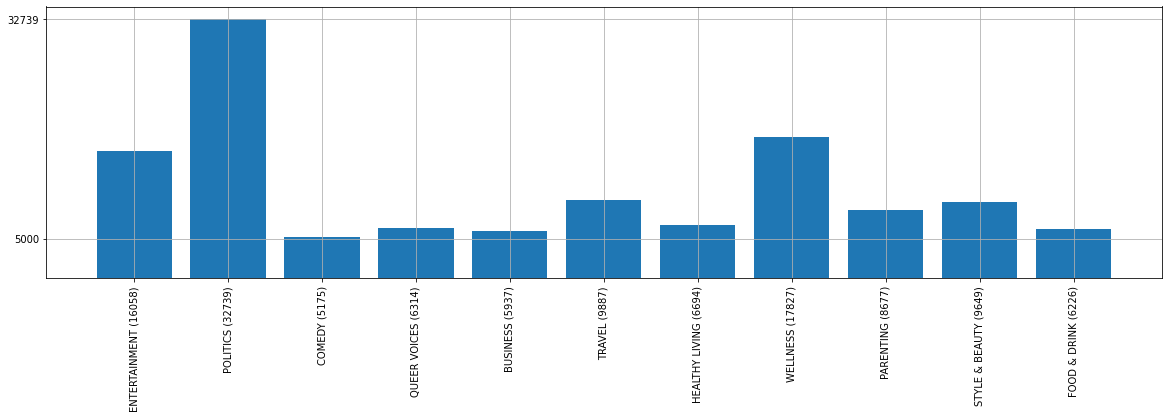

In [5]:
fig = plt.figure(figsize=(20,5))
plt.bar(categories_print, height=values)
plt.xticks(rotation=90)
plt.yticks([5000, max(values)])
plt.grid(True)

plt.savefig(SAVE_PATH, bbox_inches="tight")
#plt.show()

In [6]:
#DATASET CREATION MORE THAN 5K
df.drop(columns=['authors', 'link', 'short_description', 'date'], inplace=True)
df['label'] = 0

training = int(5000 * 0.8)
validation = int(5000 * 0.2 * 0.5)
test = int(5000 * 0.2 * 0.5)

df_train = pd.DataFrame(columns=df.columns.values)
df_validation = pd.DataFrame(columns=df.columns.values)
df_test = pd.DataFrame(columns=df.columns.values)
labelID = 0

for newName in newsCategories:
  news = df[(df.category == newName)][:5000]
  news['label'] = labelID

  news_training = news[:(training)]
  news_validation = news[(training):(training+validation)]
  news_test = news[(training+validation):]

  
  labelID += 1
  df_train = pd.concat([df_train, news_training])
  df_validation = pd.concat([df_validation, news_validation])
  df_test = pd.concat([df_test, news_test])
  

  

In [9]:
df_train = shuffle(df_train)
df_validation = shuffle(df_validation)
df_test = shuffle(df_test)


In [11]:
#df_news.to_csv('/content/drive/MyDrive/GPUs/Bert/Results/News_DataSet/MoreThan5k.csv')
df_train.to_csv('/content/drive/MyDrive/GPUs/Bert/DataSet/News_DataSet/11_CLASSES/Balanced/train.csv')
df_validation.to_csv('/content/drive/MyDrive/GPUs/Bert/DataSet/News_DataSet/11_CLASSES/Balanced/validation.csv')
df_test.to_csv('/content/drive/MyDrive/GPUs/Bert/DataSet/News_DataSet/11_CLASSES/Balanced/test.csv')